<a href="https://colab.research.google.com/github/raskapati/Data_Mining-EDA/blob/main/Group_F_Permasalahan_ADM_Case_01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong><font color="blue">Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</font></strong></h2></center>

<img alt="" src="https://github.com/taufiksutanto/ADM-Case-01-EDA/blob/main/images/Ray-pink-Property-Case-Banner.jpg?raw=1"/>

# Kasus:

* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

# Petunjuk:

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi *data driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

# Catatan:

* Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
* Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
* Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
* Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
* Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
 - Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
* Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
* Anda tidak diperkenankan bertanya pertanyaan yang:
 - Merupakan jawaban atau menjurus ke jawaban studi kasus.
 - Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
* Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)

# Komponen Penilaian:

* Code tidak diubah sejak deadline studi kasus.
* Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
* Pemilihan preprocessing dan visualisasi yang tepat
* Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
* Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.

In [ ]:
## Use R Code in Google Colab
%reload_ext rpy2.ipython

In [ ]:
## Connect to Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

# Data Understanding (DU):


Keterangan Varabel:
* Created_at: Tanggal dimana iklan rumah dibuat
* LT		: Luas Tanah properti yang ditawarkan
* LB		: Luas Bangunan properti yang ditawarkan
* KT		: Jumlah Kamar Tidur properti yang ditawarkan
* KM		: Jumlah Kamar Mandi properti yang ditawarkan
* Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport	: Jumlah kapasitas Carport di properti yang ditawarkan
* Lokasi	: Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik	: Daya listrik dari properti yang ditawarkan
* Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana
* Harga 	: Harga property yang ditawarkan dalam Rupiah
* URL		: Alamat tautan (link) property yang ditawarkan.
* Deskripsi	: Deskripsi iklan property yang ditawarkan. 

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

In [ ]:
# list data yang akan di gabung
list_dataframe = [dfJ, dfD, dfB, dfT, dfX]
# gabungkan data dengan metode concat dari pandas
df = pd.concat(list_dataframe)

Menggabungkan beberapa dataframe menjadi satu sehingga menjadi satu dataframe yang memuat seluruh data pada seluruh kota

In [ ]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,982,983,984,985,986,987,988,989,990,991
created_at,06-12-2021,02-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LT,202.0,30.0,19.0,33.0,30.0,217.0,424.0,597.0,60.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB,198.0,55.0,35.0,42.0,55.0,245.0,1000.0,700.0,98.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KT,8.0,2.0,2.0,2.0,2.0,6.0,4.0,5.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM,3.0,1.0,1.0,2.0,2.0,4.0,5.0,4.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garasi,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carport,NaN,1.0,NaN,1.0,1.0,2.0,1.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lokasi,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,SHM,SHM,SHM,SHM,SHM,SHM,SHM,SHM,SHM,SHM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,2200.0,2200.0,2200.0,2200.0,2200.0,4400.0,33000.0,8000.0,2200.0,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Untuk melihat keseluruhan data

In [ ]:
### Mengecek Informasi dari Data ###
### Didapatkan jumlah data yang tidak null dan tipe data dari masing-masing variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   664 non-null    object 
 1   LT           665 non-null    object 
 2   LB           663 non-null    float64
 3   KT           663 non-null    float64
 4   KM           662 non-null    float64
 5   garasi       333 non-null    float64
 6   carport      550 non-null    float64
 7   lokasi       663 non-null    object 
 8   sertifikat   658 non-null    object 
 9   listrik      628 non-null    float64
 10  hadap        214 non-null    object 
 11  harga        663 non-null    float64
 12  URL          663 non-null    object 
 13  deskripsi    654 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed

Mengecek Informasi dari Data
Didapatkan jumlah data yang tidak null dan tipe data dari masing-masing variabel

In [ ]:
### Menghapus Kolom Unnamed 14 Hingga Unnamed 25 ###

df.drop(df.iloc[:, 14:26], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141 entries, 0 to 991
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  664 non-null    object 
 1   LT          665 non-null    object 
 2   LB          663 non-null    float64
 3   KT          663 non-null    float64
 4   KM          662 non-null    float64
 5   garasi      333 non-null    float64
 6   carport     550 non-null    float64
 7   lokasi      663 non-null    object 
 8   sertifikat  658 non-null    object 
 9   listrik     628 non-null    float64
 10  hadap       214 non-null    object 
 11  harga       663 non-null    float64
 12  URL         663 non-null    object 
 13  deskripsi   654 non-null    object 
dtypes: float64(7), object(7)
memory usage: 614.3+ KB


Dari hasil info, didapat bahwa beberapa variabel tidak berisikan value apapun, sehingga kami menghapus variabel-variabel tersebut

In [ ]:
## Mengecek Jumlah Data dari Variabel Sertifikat ###
df['sertifikat'].value_counts()

SHM                                552
SHGB                                41
HGB                                 20
lainnya(PPJB, GIRIK, ADAT, dll)     15
SHM + IMB                           11
PPJB                                 7
Lainnya                              7
SHM,IMB                              2
SHM + IMB + PBB                      1
SHM + Hak Pakai                      1
AJB                                  1
Name: sertifikat, dtype: int64

Ingin melihat isi dari variabel 'Sertifikat' untuk mempertimbangkan pengubahan jenis data menjadi kategorik

In [ ]:
### Mengelompokkan Value dari Variabel Sertifikat ###
### Mengelompokkan value dari format penamaaan berbeda menjadi format penamaan yang sama
df['sertifikat'] = df['sertifikat'].replace(['SHM,IMB'],'SHM + IMB')
df['sertifikat'] = df['sertifikat'].replace(['lainnya(PPJB, GIRIK, ADAT, dll)'],'Lainnya')
df['sertifikat'].value_counts()

SHM                552
SHGB                41
Lainnya             22
HGB                 20
SHM + IMB           13
PPJB                 7
SHM + IMB + PBB      1
SHM + Hak Pakai      1
AJB                  1
Name: sertifikat, dtype: int64

Pada hasil sebelumnya, terlihat bahwa isi dari variabel 'Sertifikat' belum rapi, sehingga kami merapikan terlebih dahulu agar lebih mudah dibaca

In [ ]:
print(df.isnull().sum())

created_at    3477
LT            3476
LB            3478
KT            3478
KM            3479
garasi        3808
carport       3591
lokasi        3478
sertifikat    3483
listrik       3513
hadap         3927
harga         3478
URL           3478
deskripsi     3487
dtype: int64


Kami mencari row data yang memiliki MV

In [ ]:
df.dropna(how='all', inplace=True)
print(df.isnull().sum())

created_at      1
LT              0
LB              2
KT              2
KM              3
garasi        332
carport       115
lokasi          2
sertifikat      7
listrik        37
hadap         451
harga           2
URL             2
deskripsi      11
dtype: int64


Kami menghapus seluruh baris yang pada seluruh kolomnya adalah MV

In [ ]:
df.drop(columns=['hadap'], inplace=True)
df.drop(columns=['garasi'], inplace=True)
print(df.isnull().sum())
df.shape

created_at      1
LT              0
LB              2
KT              2
KM              3
carport       115
lokasi          2
sertifikat      7
listrik        37
harga           2
URL             2
deskripsi      11
dtype: int64


(665, 12)

Karena pada variabel 'Garasi' dan 'Hadap' memiliki MV pada lebih dari 50% data, maka kami mengkonsiderasi untuk menghapus seluruh kolom variabel 'Garasi' dan 'Hadap'

In [ ]:
### Mengubah Tipe Data ###
### Mengubah tipe data variabel sertifikat menjadi variabel kategorik
df['sertifikat'] = df['sertifikat'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 106
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   created_at  664 non-null    object  
 1   LT          665 non-null    object  
 2   LB          663 non-null    float64 
 3   KT          663 non-null    float64 
 4   KM          662 non-null    float64 
 5   carport     550 non-null    float64 
 6   lokasi      663 non-null    object  
 7   sertifikat  658 non-null    category
 8   listrik     628 non-null    float64 
 9   harga       663 non-null    float64 
 10  URL         663 non-null    object  
 11  deskripsi   654 non-null    object  
dtypes: category(1), float64(6), object(5)
memory usage: 63.4+ KB


In [ ]:
print(df.shape)
df.duplicated().sum()

(665, 12)


0

Tidak terdapat row data yang duplikat

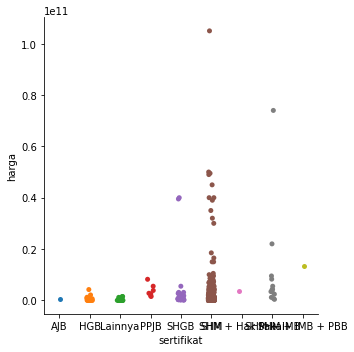

In [ ]:
import seaborn as sns
p= sns.catplot(x="sertifikat", y="harga", data=df)
p

Dari hasil di atas, terindikasi terdapat outlier pada data.

In [ ]:
import numpy as np

normal = np.abs(df.harga - df.harga.mean())<=(2*df.harga.std())
# mu-2s<x<mu+2s
print(normal.shape)
normal.head()

(665,)


0    True
1    True
2    True
3    True
4    True
Name: harga, dtype: bool

Dengan asumsi distribusi normal, kami memisahkan data yang tidak memiliki outlier

In [ ]:
dfclean= df[normal] # Data tanpa outliers
print(dfclean.shape, df.shape)

(647, 12) (665, 12)


Kami telah mendapatkan data yang tidak memiliki outlier dengan nama 'dfclean'

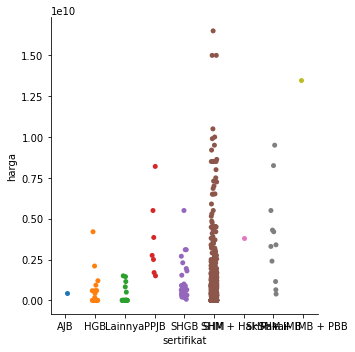

In [ ]:
p= sns.catplot(x="sertifikat", y="harga", data=dfclean)

In [ ]:
dfclean.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
created_at,647,25,06-12-2021,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LT,647.0,223.0,60.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB,647.0,NaN,NaN,NaN,136.788253,163.222151,15.0,48.0,80.0,168.0,2500.0
KT,647.0,NaN,NaN,NaN,3.102009,1.324494,1.0,2.0,3.0,4.0,10.0
KM,646.0,NaN,NaN,NaN,2.249226,1.317076,1.0,1.0,2.0,3.0,10.0
carport,536.0,NaN,NaN,NaN,1.442164,0.94938,0.0,1.0,1.0,2.0,10.0
lokasi,647,86,Kota Bekasi,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,642,9,SHM,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,613.0,NaN,NaN,NaN,2741.598695,3585.744568,900.0,1300.0,2200.0,2200.0,66000.0
harga,647.0,NaN,NaN,NaN,1147857872.802164,2080038735.255811,41.0,1880.0,440550000.0,1240000000.0,16500000000.0


Kualitas Data:
- Terlalu banyak kolom yang tidak memuat informasi
- Terlalu banyak informasi yang hilang
- Beberapa kategori memiliki inti yang sama, 
tetapi penamaannya berbeda

Saran:
- format penamaan kategori dalam suatu variabel sebaiknya disamakan
